<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Выводы" data-toc-modified-id="Выводы-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Взвешивание-классов" data-toc-modified-id="Взвешивание-классов-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Взвешивание классов</a></span></li><li><span><a href="#Увеличение-выборки" data-toc-modified-id="Увеличение-выборки-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Увеличение выборки</a></span></li><li><span><a href="#Уменьшение-выборки" data-toc-modified-id="Уменьшение-выборки-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Уменьшение выборки</a></span></li><li><span><a href="#Лучшая-сбалансированная-модель" data-toc-modified-id="Лучшая-сбалансированная-модель-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Лучшая сбалансированная модель</a></span></li><li><span><a href="#Выводы" data-toc-modified-id="Выводы-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Выводы</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

**Цель проекта:** необходимо создать модель, прогнозирующую уйдет ли клиент из банка в ближайшее время или нет. При этом *F1*-метрика модели на тестовой выборке должна быть не менее 0,59. Результаты проекта помогут банку сохранить клиентов, что согласно результатом исследования банковских маркетологов, выгоднее, чем привлекать новых.

**Исходные данные:** исторические данные о поведении клиентов и расторжении договоров с банком.

*Источник данных:* [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

**Описание данных:**
* RowNumber — индекс строки в данных
* CustomerId — уникальный идентификатор клиента
* Surname — фамилия
* CreditScore — кредитный рейтинг
* Geography — страна проживания
* Gender — пол
* Age — возраст
* Tenure — сколько лет человек является клиентом банка
* Balance — баланс на счёте
* NumOfProducts — количество продуктов банка, используемых клиентом
* HasCrCard — наличие кредитной карты
* IsActiveMember — активность клиента
* EstimatedSalary — предполагаемая зарплата

## Подготовка данных

Загружаем необходимые библиотеки.

In [1]:
import pandas as pd
import numpy as np
from math import ceil
from matplotlib import pyplot as plt
from sklearn.metrics import f1_score, roc_auc_score, roc_curve, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.utils import shuffle

Загружаем файл и сохраняем его содержимое под именем source_data. Затем выводим основную информацию об исходных данных.

In [2]:
source_data = pd.read_csv("/datasets/Churn.csv")
source_data.info()
source_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
source_data.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Удаляем столбцы с данными, не влияющими на целевой признак: номер столбца (RowNumber), уникальный id (CustomerId) и фамилия (Surname). Кроме того удаляем строки где имеются пропуски. В нашем случае пропуски имеются в столбце Tenure (сколько лет человек является клиентом банка). Пропуски в столбце Tenure составляют около 9 процентов, таким образом, мы теряем 9 процентов исходной информации. Возможной альтернативой является сохранение всех строк при удалении всего столбца Tenure. Какой путь оптимальный заранее неизвестно. Поэтому останавливаемся на первом варианте, в случае если с ним не удастся получить F1 больше 0,59, тогда вернемся ко второму альтернативному варианту. Полученный результат сохраняем под именем data.

In [4]:
data = source_data.drop(["RowNumber", "CustomerId", "Surname"], axis=1)
data.dropna(inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


Применяем технику прямого кодирования (One-Hot Encoding) для преобразования категориальных признаков в численные. При этом устанавливаем параметр drop_first=True для того, чтобы избежать фиктивной переменной. Затем разделим исходные данные на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.

In [5]:
data_ohe = pd.get_dummies(data, drop_first=True)
target = data_ohe["Exited"]
features = data_ohe.drop("Exited", axis=1)
features_train, features_valid_test, target_train, target_valid_test = train_test_split(
    features, target, test_size=0.4, random_state=56789)
features_valid, features_test, target_valid, target_test = train_test_split(
    features_valid_test, target_valid_test, test_size=0.5, random_state=56789)
print("Размер обучающей выборки равен:", features_train.shape[0], "строк.")
print("Размер валидационной выборки равен:", features_valid.shape[0], "строк.")
print("Размер тестовой выборки равен:", features_test.shape[0], "строк.")

Размер обучающей выборки равен: 5454 строк.
Размер валидационной выборки равен: 1818 строк.
Размер тестовой выборки равен: 1819 строк.


Выполним масштабирование для численных признаков методом стандартизации данных

In [6]:
pd.options.mode.chained_assignment = None
numeric = ["CreditScore", "Age", "Tenure", "Balance", "NumOfProducts", "EstimatedSalary"]
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])
print(features_train.head())

      CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
8883    -1.853792 -1.048484  0.003935 -1.215399       0.803943          1   
6524     0.003436 -0.383185 -1.380742  1.405236       2.526813          1   
9600    -0.306102  1.517667  0.696274  0.882280      -0.918927          0   
9975    -0.419600  1.042454 -1.380742  0.608903       0.803943          1   
6435     0.509014 -1.238569 -0.342234  0.689788      -0.918927          1   

      IsActiveMember  EstimatedSalary  Geography_Germany  Geography_Spain  \
8883               1        -1.349248                  0                1   
6524               1        -1.223405                  1                0   
9600               1        -0.420580                  1                0   
9975               0         1.683752                  1                0   
6435               0         0.732942                  0                0   

      Gender_Male  
8883            0  
6524            0  
9600          

### Выводы 

1. Файл с исходными данными (размер 10000х14) загружен и преобразован в датафрейм.
2. В исходных данных имеются пропуски в столбце Tenure (около 9% строк). Строки с пропусками удалены.
3. Удалены столбцы с признаками, не влияющими на целевой признак: номер столбца (RowNumber), уникальный id (CustomerId) и фамилия (Surname).
4. Категориальные признаки преобразованы в количественные методом прямого кодирования (One-Hot Encoding).
5. Исходные данные разделены на три выборки: обучающую, валидационную и тестовую в соотношении 3:1:1.
6. Выполнено масштабирование для численных признаков методом стандартизации данных.

## Исследование задачи

Исследуем дисбаланс классов.

In [7]:
target_train.value_counts(normalize=True)

0    0.795746
1    0.204254
Name: Exited, dtype: float64

Мы имеем 20% положительных ответов и 80% процентов отрицательных: налицо дисбаланс классов. Выполним исследование сперва без учета данного дисбаланса.

Основная задача исследования - поиск модели с предельно большим значением F1. Из опыта известно, что модель случайного леса, как правило, дает более точный результат, чем логистическая регрессия или решающее дерево. Следовательно, будем рассматривать модель случайного леса и подберем для нее наиболее оптимальные гиперпараметры (максимальная глубина, количество решающих деревьев) путем их перебора в цикле. Полученные результаты сохраним в таблице.

In [8]:
column_1 = []
column_2 = []
column_3 = []
column_4 = []
for est in range(10, 81, 10):
    for depth in range(2, 12, 1):
        model = RandomForestClassifier(random_state=56789, n_estimators=est, max_depth=depth)
        model.fit(features_train, target_train)
        predicted_valid = model.predict(features_valid)
        probabilities_valid = model.predict_proba(features_valid)
        probabilities_one_valid = probabilities_valid[:, 1]
        result_f1 = f1_score(target_valid, predicted_valid)
        result_auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
        column_1.append(est)
        column_2.append(depth)
        column_3.append(result_f1)
        column_4.append(result_auc_roc)

In [9]:
f1_table_unbalanced = pd.DataFrame(
    {"n_estimators": column_1, "max_depth": column_2, "f1_score": column_3, "auc_roc_score": column_4}
)
f1_table_unbalanced.sort_values(by="f1_score", ascending=False, inplace=True)
f1_table_unbalanced["f1_score"] = f1_table_unbalanced["f1_score"].round(3)
f1_table_unbalanced["auc_roc_score"] = f1_table_unbalanced["auc_roc_score"].round(3)
f1_table_unbalanced

,n_estimators,max_depth,f1_score,auc_roc_score
16,20,8,0.548,0.848
79,80,11,0.547,0.857
39,40,11,0.545,0.852
49,50,11,0.545,0.853
78,80,10,0.543,0.856
...,...,...,...,...
20,30,2,0.105,0.791
0,10,2,0.095,0.780
50,60,2,0.081,0.806
30,40,2,0.081,0.794


Как видно из таблицы, по критерию F1 наиболее успешная модель - модель с 20 решающими деревьями и максимальной глубиной равной 8. Всего на одну тысячную (F1 равно 0,547 против 0,548) отстает модель с 80 деревьями и максимальной глубиной равной 11. Такую маленькую разницу, вероятно, следует считать случайностью. Учтем, что по критерию AUC-ROC модель с 80 деревьями имеет существенный перевес (0,857 против 0,848). С учетом этого примем модель с 80 деревьями и максимальной глубиной равной 11 в качестве лучшей несбалансированной модели.

Выведим отдельно основные характеристики лучшей несбалансированной модели:

In [10]:
model = RandomForestClassifier(random_state=56789, n_estimators=80, max_depth=11)
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
f1_valid_unbalanced = f1_score(target_valid, predicted_valid)
auc_roc_valid_unbalanced = roc_auc_score(target_valid, probabilities_one_valid)
print("F1 лучшей несбалансированной модели равняется: {:.3f}".format(f1_valid_unbalanced))
print("AUC-ROC лучшей несбалансированной модели равняется: {:.3f}".format(auc_roc_valid_unbalanced))

F1 лучшей несбалансированной модели равняется: 0.547
AUC-ROC лучшей несбалансированной модели равняется: 0.857


Заданный критерий F1 > 0.59 лучшей несбалансированной моделью не достигнут.

Построим на валидационной выборке ROC кривую для лучшей несбалансированной модели.

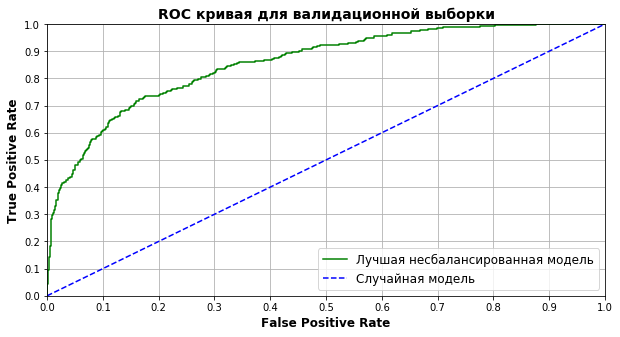

In [11]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel("False Positive Rate", fontsize=12, fontweight="bold")
ax.set_ylabel("True Positive Rate", fontsize=12, fontweight="bold")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1])
ax.set_title("ROC кривая для валидационной выборки", fontsize=14, fontweight="bold")
ax.plot(fpr, tpr, color="g", label="Лучшая несбалансированная модель")
ax.plot([0.0, 1.0], [0.0, 1.0], linestyle="--", color="b", label="Случайная модель")
ax.xaxis.grid()
x = np.arange(0,1.1,0.1)
plt.xticks(x)
plt.yticks(x)
ax.yaxis.grid()
ax.legend(fontsize=12)
plt.show()

### Выводы

1. Выявлен дисбланс классов. Положительных ответов - 20%, отрицательных - 80%.
2. Выполненно исследование моделей без исправления дисбаланса классов.
3. В результате перебора гиперпараметров для модели случайного леса определены оптимальные гиперпараметры: количество решающих деревьев равно 80, максимальная глубина дерева - 11. Модель случайного леса с оптимальными гиперпараметрами получила обозначение - лучшая несбалансированная модель.
4. Для лучшей несбалансированной модели F1 = 0,55 и AUC-ROC = 0,857. Заданный критерий F1 > 0.59 лучшей несбалансированной моделью не достигнут.

## Борьба с дисбалансом

Исправим дисбаланс классов тремя различными методами: методом взвешивания классов, методом увеличения выборки и методом уменьшения выборки.

### Взвешивание классов

Выполним взвешивание классов путем задания параметра class_weight="balanced"

In [12]:
model = RandomForestClassifier(random_state=56789, n_estimators=80, max_depth=11, class_weight="balanced")
model.fit(features_train, target_train)
predicted_valid = model.predict(features_valid)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
f1_valid = f1_score(target_valid, predicted_valid)
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
print("F1 для сбалансированной модели №1 равняется: {:.3f}".format(f1_valid))
print("AUC-ROC сбалансированной модели №1 равняется: {:.3f}".format(auc_roc_valid))

F1 для сбалансированной модели №1 равняется: 0.597
AUC-ROC сбалансированной модели №1 равняется: 0.849


F1 равняется 0,597, что больше требуемых 0,59.

### Увеличение выборки

Напишем программу upsample для увеличения выборки. Данная программа принимает два массива с признаками (features и target) и множитель (repeat), на которой умножается исходная выборка с положительными ответами. Возвращает программа увеличенную выборку в виде двух массивов: один содержит целевые признаки (target_upsampled), другой - остальные признаки (features_upsampled). В программе используется перемешивание строк методом shuffle.

In [13]:
def upsample(features, target, repeat):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_upsampled = pd.concat([features_zero] + [features_one] * repeat)
    target_upsampled = pd.concat([target_zero] + [target_one] * repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=56789)
    
    return features_upsampled, target_upsampled

Для подсчета максимально возможного значения множителя repeat примем, что количество положительных ответов недолжно превосходить количество отрицательных. Полученный результат округлим вверх.

In [14]:
repeat_max = ceil(target_train.value_counts()[0] / target_train.value_counts()[1])
repeat_max

4

Из расчета получилось, что максимальное значение repeat равняется 4.

Переберем при помощи цикла различные значения repeat (от 2 до 4 включительно с шагом 1) и для каждого случая подсчитаем f1.

In [15]:
for repeat in range(2, repeat_max + 1):
    features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=repeat)
    model = RandomForestClassifier(random_state=56789, n_estimators=80, max_depth=11)
    model.fit(features_upsampled, target_upsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
    f1_valid = f1_score(target_valid, predicted_valid)
    print("При repeat={} F1 равняется {:.3f}, AUC-ROC равняется {:.3f}".format(repeat, f1_valid, auc_roc_valid))

При repeat=2 F1 равняется 0.595, AUC-ROC равняется 0.854
При repeat=3 F1 равняется 0.610, AUC-ROC равняется 0.855
При repeat=4 F1 равняется 0.592, AUC-ROC равняется 0.845


Оптимальное значение repeat равняется трем. При данном значении мы получили максимальное значение F1 среди всех рассмотренных моделей, равное 0,610. Критерий F1 > 0.59 выполняется.

### Уменьшение выборки

Напишем программу для уменьшения выборки. Данная программа принимает два массива с признаками (features и target) и множитель (fraction), составляющий долю единицы, на которой умножается исходная выборка с отрицательными ответами. Возвращает программа уменьшенную выборку в виде двух массивов: один содержит целевые признаки (target_downsampled), другой - остальные признаки (features_downsampled). В программе используется перемешивание строк методом shuffle.

In [16]:
def downsample(features, target, fraction):
    features_zero = features[target == 0]
    features_one = features[target == 1]
    target_zero = target[target == 0]
    target_one = target[target == 1]
    
    features_downsampled = pd.concat([features_zero.sample(frac=fraction, random_state=56789)] + [features_one])
    target_downsampled = pd.concat([target_zero.sample(frac=fraction, random_state=56789)] + [target_one])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=56789)
    
    return features_downsampled, target_downsampled

Для подсчета минимально возможного значения множителя fraction примем, что количество положительных ответов недолжно превосходить количество отрицательных. Полученный результат округлим до сотых.

In [17]:
fraction_min = round(1 / repeat_max, 2)
fraction_min

0.25

Из расчета минимальное значение fraction равняется 0,25.

Переберем при помощи цикла различные значения fraction (от 0,25 до 1  с шагом 0,25) и для каждого случая подсчитаем F1.

In [18]:
for fraction in np.around(np.arange(fraction_min, 1, 0.25), decimals=2):
    features_downsampled, target_downsampled = downsample(features_train, target_train, fraction)
    model = RandomForestClassifier(random_state=56789, n_estimators=80, max_depth=11)
    model.fit(features_downsampled, target_downsampled)
    predicted_valid = model.predict(features_valid)
    probabilities_valid = model.predict_proba(features_valid)
    probabilities_one_valid = probabilities_valid[:, 1]
    f1_valid = f1_score(target_valid, predicted_valid)
    auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
    print("При fraction={} F1 равняется {:.3f}, AUC-ROC равняется {:.3f}".format(fraction, f1_valid, auc_roc_valid))

При fraction=0.25 F1 равняется 0.585, AUC-ROC равняется 0.850
При fraction=0.5 F1 равняется 0.598, AUC-ROC равняется 0.854
При fraction=0.75 F1 равняется 0.568, AUC-ROC равняется 0.852


Оптимальное значение fraction составляет 0.5. При данном значении fraction мы имеем максимальное значение F1 = 0.598 (критерий F1 > 0.59 выполняется). Однако данное значение уступает лучшему результату достигнутому путем увеличения выборки (F1 = 0.610). Таким образом, оптимальным методом исправления дисбаланаса, согласно выполненному исследованию, является метод увеличения выборки.

### Лучшая сбалансированная модель

Рассмотрим лучшую сбалансированную модель, согласно выполненному исследованию.

In [19]:
features_upsampled, target_upsampled = upsample(features_train, target_train, repeat=3)
model_best = RandomForestClassifier(random_state=56789, n_estimators=80, max_depth=11)
model_best.fit(features_upsampled, target_upsampled)
predicted_valid = model_best.predict(features_valid)
probabilities_valid = model_best.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc_valid = roc_auc_score(target_valid, probabilities_one_valid)
f1_valid = f1_score(target_valid, predicted_valid)
print("F1 лучшей сбалансированной модели на валидационной выборке равняется: {:.3f}".format(f1_valid))
print("AUC-ROC лучшей сбалансированной модели на валидационной выборке равняется: {:.3f}".format(auc_roc_valid))

F1 лучшей сбалансированной модели на валидационной выборке равняется: 0.610
AUC-ROC лучшей сбалансированной модели на валидационной выборке равняется: 0.855


Построим на валидационной выборке ROC кривую для лучшей модели.

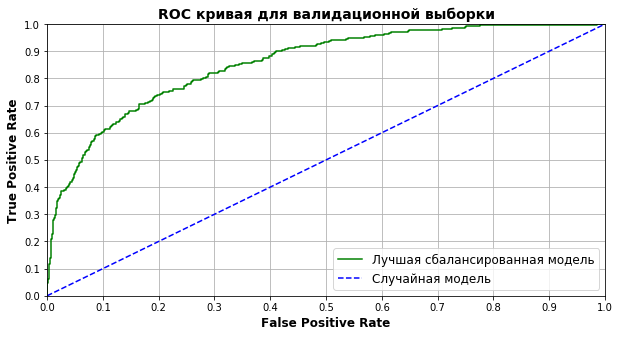

In [20]:
fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel("False Positive Rate", fontsize=12, fontweight="bold")
ax.set_ylabel("True Positive Rate", fontsize=12, fontweight="bold")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1])
ax.set_title("ROC кривая для валидационной выборки", fontsize=14, fontweight="bold")
ax.plot(fpr, tpr, color="g", label="Лучшая сбалансированная модель")
ax.plot([0.0, 1.0], [0.0, 1.0], linestyle="--", color="b", label="Случайная модель")
ax.xaxis.grid()
x = np.arange(0,1.1,0.1)
plt.xticks(x)
plt.yticks(x)
ax.yaxis.grid()
ax.legend(fontsize=12)
plt.show()

### Выводы

1. Выявленный дисбаланс классов исправлен тремя различными методами: методом взвешивания классов, методом увеличения выборки и методом уменьшения выборки.
2. Лучшая F1 метрика составляет 0,597, 0,610 и 0,598 для метода взвешивания классов, увеличения выборки и уменьшения выборки соответственно. Таким образом, лучший результат показал метод увеличения выборки. Модель, полученную с его использованием, будем считать лучшей сбалансированной моделью.

## Тестирование модели

Выполним тестирование лучшей сбалансированной модели, используя тестовую выборку

In [21]:
predicted_test = model_best.predict(features_test)
probabilities_test = model_best.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]
auc_roc_test = roc_auc_score(target_test, probabilities_one_test)
f1_test = f1_score(target_test, predicted_test)
print("F1 лучшей сбалансированной модели на тестовой выборке равняется: {:.3f}".format(f1_test))
print("AUC-ROC лучшей сбалансированной модели на тестовой выборке равняется: {:.3f}".format(auc_roc_test))

F1 лучшей сбалансированной модели на тестовой выборке равняется: 0.594
AUC-ROC лучшей сбалансированной модели на тестовой выборке равняется: 0.851


Построим на тестовой выборке ROC кривую для лучшей сбалансированной модели.

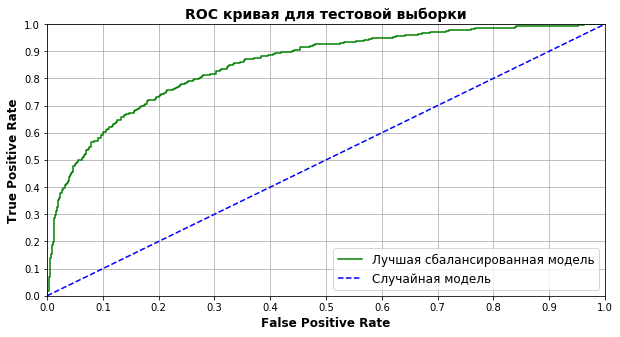

In [22]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.set_xlabel("False Positive Rate", fontsize=12, fontweight="bold")
ax.set_ylabel("True Positive Rate", fontsize=12, fontweight="bold")
ax.set_xlim([0.0, 1.0])
ax.set_ylim([0.0, 1])
ax.set_title("ROC кривая для тестовой выборки", fontsize=14, fontweight="bold")
ax.plot(fpr, tpr, color="g", label="Лучшая сбалансированная модель")
ax.plot([0.0, 1.0], [0.0, 1.0], linestyle="--", color="b", label="Случайная модель")
ax.xaxis.grid()
x = np.arange(0,1.1,0.1)
plt.xticks(x)
plt.yticks(x)
ax.yaxis.grid()
ax.legend(fontsize=12)
plt.show()

Дополнительно получим матрицу ошибок для лучшей сбалансированной модели на тестовой выборке

In [23]:
print(confusion_matrix(target_test, predicted_test))

[[1289  169]
 [ 137  224]]


### Вывод

Лучшая сбалансированная модель показала следующие результаты на тестовой выборке: F1 = 0.594, AUC-ROC = 0.851. Таким образом, данная модель отвечает заданному критерию F1 > 0.59.

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*